<a href="https://colab.research.google.com/github/shalini-03-03-2006/Shalini-NM/blob/main/SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

In [8]:
df=pd.read_csv('/content/test.csv')
df = df.drop_duplicates()
df = df.dropna()
print(df)

                                                   text  label
0     im feeling rather rotten so im not very ambiti...      0
1             im updating my blog because i feel shitty      0
2     i never make her separate from me because i do...      0
3     i left with my bouquet of red and yellow tulip...      1
4       i was feeling a little vain when i did this one      0
...                                                 ...    ...
1995  i just keep feeling like someone is being unki...      3
1996  im feeling a little cranky negative after this...      3
1997  i feel that i am useful to my people and that ...      1
1998  im feeling more comfortable with derby i feel ...      1
1999  i feel all weird when i have to meet w people ...      4

[2000 rows x 2 columns]


In [ ]:
print(df.head())

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [ ]:
def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
  df['clean_text']=df['text'].apply(clean_text)
  print (df['clean_text'])
print (df.head())

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


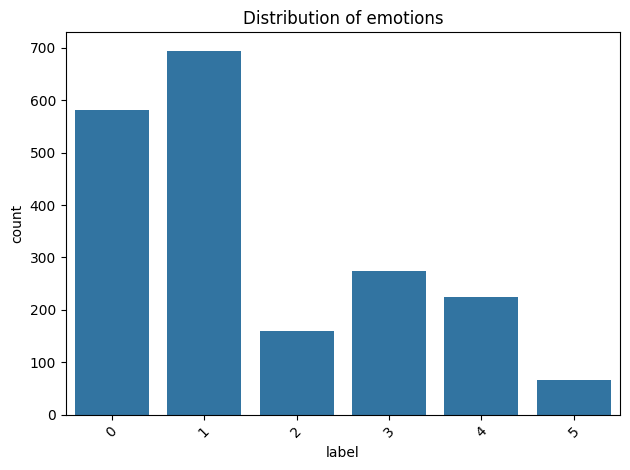

In [10]:
sns.countplot(x='label',data=df)
plt.title('Distribution of emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
X=df['text']
y=df['label']
vectorizer=TfidfVectorizer(max_features=5000)
X_vec=vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

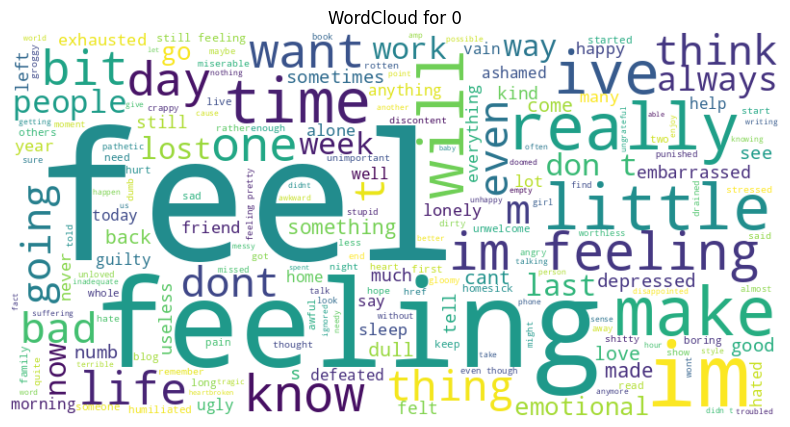

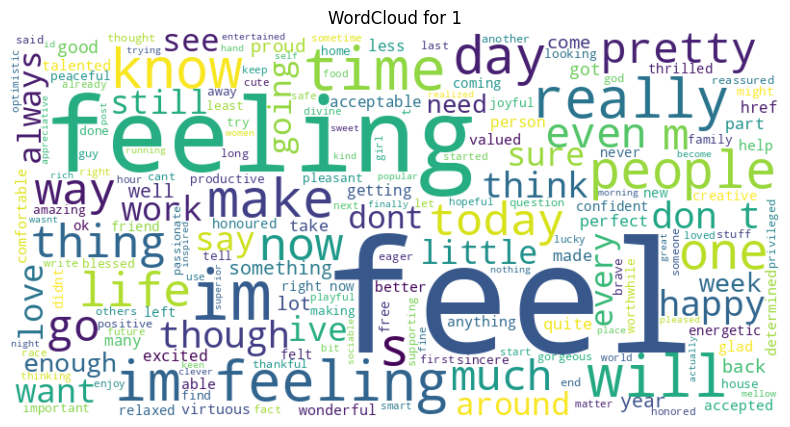

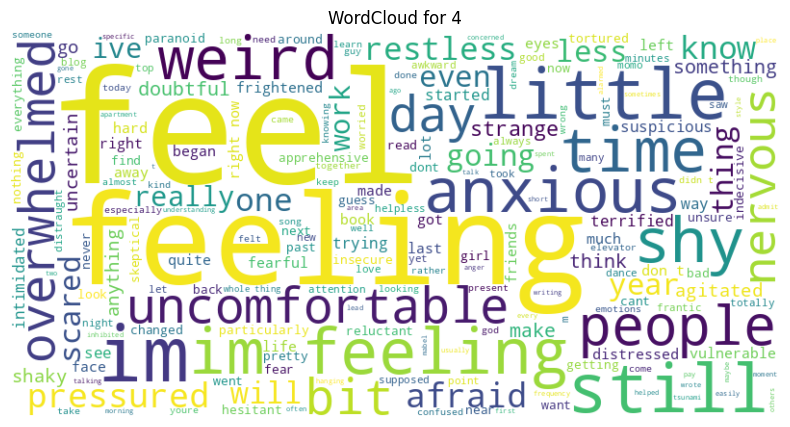

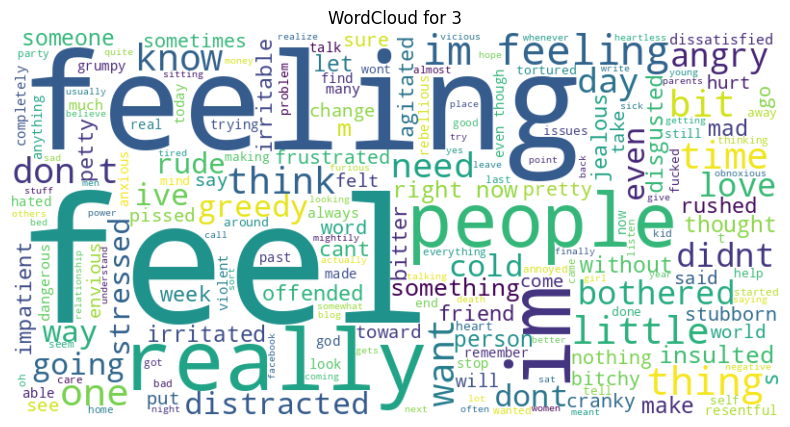

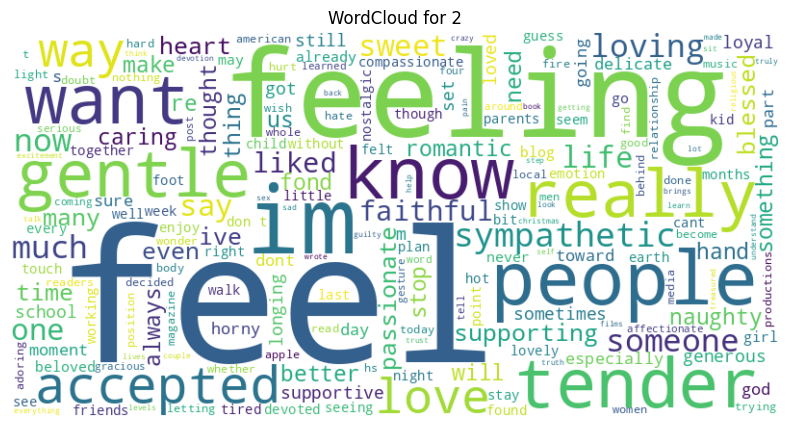

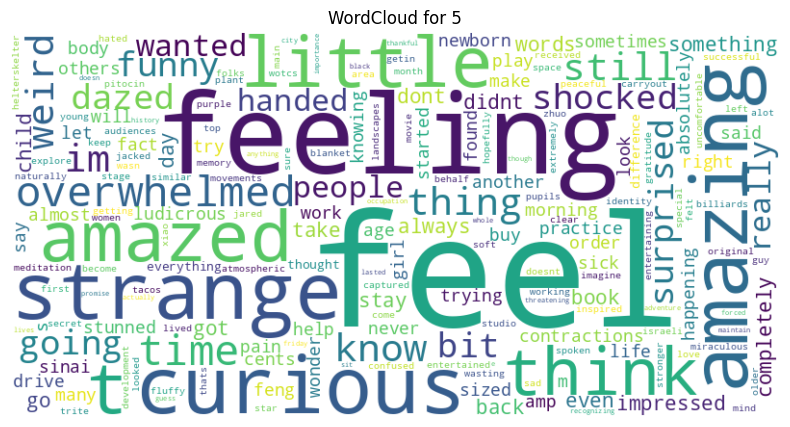

In [15]:

def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
df['clean_text']=df['text'].apply(clean_text) # Moved this line outside the function
emotion_types=df['label'].unique()
for emotion in emotion_types:
  text=' '.join(df[df['label']==emotion]['clean_text'])
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.title(f'WordCloud for {emotion}')
  plt.axis('off')
  plt.show()

In [ ]:

X=df['clean_text']
y=df['label']
vectorizer=TfidfVectorizer(max_features=5000)
X_vec=vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Classification Report:
Accuracy: 0.5675
Precision: 0.6329054376264678
Recall: 0.5675
F1 Score: 0.48879947144894104

Confusion Matrix:
 [[ 91  32   0   0   1   0]
 [  9 121   0   0   1   0]
 [ 13  21   1   0   0   0]
 [ 17  28   0   7   0   0]
 [ 14  21   0   1   7   0]
 [  4  10   0   1   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67       124
           1       0.52      0.92      0.66       131
           2       1.00      0.03      0.06        35
           3       0.78      0.13      0.23        52
           4       0.78      0.16      0.27        43
           5       0.00      0.00      0.00        15

    accuracy                           0.57       400
   macro avg       0.61      0.33      0.31       400
weighted avg       0.63      0.57      0.49       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

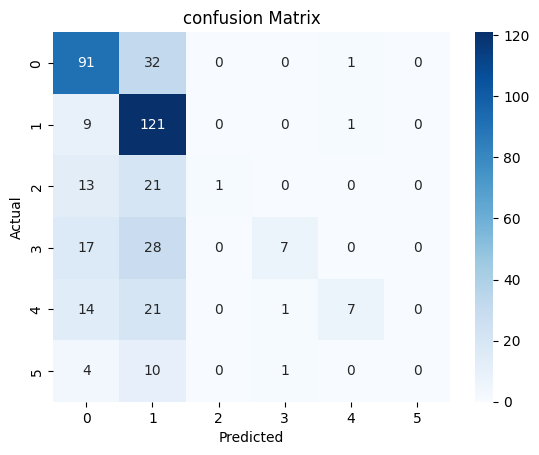

In [16]:
y_pred=model.predict(X_test)
print("Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("Recall:", recall_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues') # Changed cm to confusion_matrix(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion Matrix')
plt.show()

In [ ]:

def predict_emotion(text):
  cleaned=clean_text(text)
  vec=vectorizer.transform([cleaned])
  return model.predict(vec)[0]
print(predict_emotion("This is the Best day ever."))

1


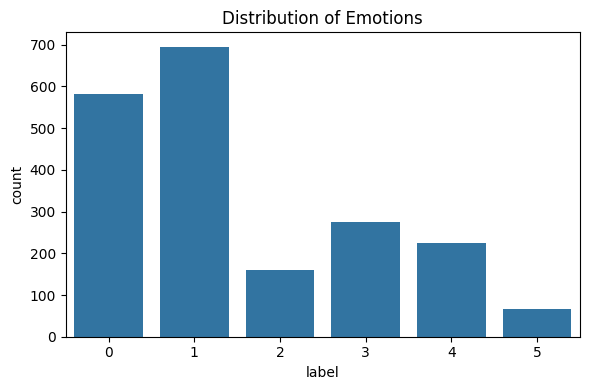

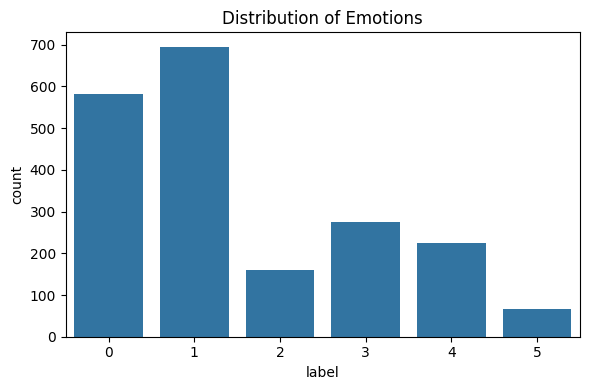

In [18]:

plt.figure(figsize=(6,4))
sns.countplot(x='label',data=df)
plt.title('Distribution of Emotions')
plt.tight_layout()
display(plt.gcf())